## **PROJECT 03**

### **Feature Selection**

Dalam mengerjakan sebuah data science project, banyak hal yang mempengaruhi hasil prediksi kita. Selain dari pemilhan algoritma yang tepat, feature/predictor yang kita gunakan juga sangat penting. Oleh karena itu, kita dapat melakukan proses Feature Selection.
Feature Selection adalah proses memilih sejumlah feature dari seluruh feature yang ada pada suatu dataset untuk digunakan dalam membangun model. 

Feature Selection bisa dilakukan pada tahap pre-processing, yaitu sebelum melakukan modeling/training data. Beberapa metode Feature Selection juga dapat dilakukan sekaligus saat melakukan modeling, atau setelah modeling seperti LASSO dan Tree Based Selection. 
Feature Selection dapat digunakan baik pada kasus supervised learning maupun unsupervised learning.

Alasan melakukan Feature Selection:

-	Tidak semua feature berguna dalam melakukan prediksi.
-	Curse of Dimensionality. Terlalu banyak feature dapat menurunkan performa model.
-	Semakin banyak feature yang digunakan, semakin sulit juga model tersebut untuk dijelaskan. Dengan menggunakan feature yang tidak terlalu banyak, model yang terbentuk akan semakin simple serta lebih mudah dijelaskan dan diinterpretasi.
-	Terlalu banyak feature dapat menyebabkan overfitting. Performa modelnya bagus pada saat training saja, tapi performanya menurun saat melakukan prediksi pada data test.
-	Semakin sedikit feature yang digunakan, semakin cepat komputasi pada saat model melakukan training.

Ada banyak metode feature selection. Kali ini saya akan melakukan beberapa metode saja, di antaranya:
- Fiter Method:
    - Missing Value
    - Low Variance
    - Duplicate
<br><br>

- Wrapper Method:
    - Forward feature selection
    - Backward feature selection
    - Exhaustivefeature selection


### **Libararies**

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score
from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, SelectPercentile

# Filter Method

Kelebihan:
- Dilakukan pada tahap preprocessing.
- Tidak bergantung pada algoritma yang digunakan untuk modeling.
- Secara komputasi lebih ringan dari pada metode lain.
- Bagus untuk dilakukan pada dataset dengan kolom yang banyak.
- Tidak cenderung overfitting

Kekurangan:
- Performa model yang menggunakan feature yang dihasilkan dari Filter Method ada kemungkinan bukan yang terbaik, karena pada univariate technique, feature selection hanya memperhatikan feature itu sendiri, tanpa melihat keterkaitannya dengan feature lain. 

Kita akan membahas 3 metode feature selection pada filter method: 
- Missing Value Percentage
- Low Variance
- Duplicate Feature

Dataset yang akan kita gunakan:

https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv

In [2]:
df_santander = pd.read_csv('santander_satisfaction.csv', nrows=20000)
df_santander.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


## **Missing Value Percentage**

Jika jumlah missing value pada suatu feature/kolom sangat banyak, maka kita bisa buang feature tersebut. Kita bisa buang feature yang memiliki 95% missing value.


In [3]:
for i,j in enumerate(df_santander.isna().sum()):
    if j>0.95:
        print('missing value =',j/len(df_santander.columns), df_santander.columns[i])    

# Tidak ada feature yang memiliki missing value > 95%

## **Low Variance**

Jika suatu feature/kolom memiliki nilai variance yang sangat kecil, maka feature tersebut bisa kita buang.

In [4]:
# Awalnya dataset santander memiliki 371 features
df_santander.shape

(20000, 371)

In [5]:
# feature dan target
X = df_santander.drop(columns='TARGET')
y = df_santander['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

In [6]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=0)

In [7]:
# Scaling
# from sklearn.preprocessing import StandardScaler,MinMaxScaler
# scale = MinMaxScaler()

# X_train = scale.fit_transform(X_train)
# X_test = scale.transform(X_test)

#### Constant Features

Kita akan membuang feature yang memiliki nilai variance 0. Dengan kata lain, semua nilai pada feature tersebut seragam.

In [8]:
from sklearn.feature_selection import VarianceThreshold

# Filter pada feature yang memiliki nilai variance 0
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [9]:
# Jumlah feature yang tidak constant (yang memiliki nilai variance bukan 0). Feature inilah yang akan digunakan untuk modeling.
constant_filter.get_support().sum()

291

In [10]:
# transform
X_train_filtered = constant_filter.transform(X_train)
X_test_filtered = constant_filter.transform(X_test)

# Jumlah feature setelah dilakukan fitering tersisa 291 dari yang awalnya berjumlah 370 features.
X_train_filtered.shape, X_train.shape

((16000, 291), (16000, 370))

In [11]:
# Memilih feature yang memiliki nilai variance 0
constant_features = [not i for i in constant_filter.get_support()]

# Feature yang memiliki nilai variance 0
df_X_train = pd.DataFrame(X_train)
df_X_train.columns[constant_features]

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0',
       'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0',
       'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27',
       'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46',
       'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27',
       'saldo_var34', 'saldo_var41', 'saldo_var46',
       'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var33_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var7_emit_ult1',
       'imp

In [12]:
len(df_X_train.columns[constant_features])
# Ada 79 feature yang memiliki nilai variance 0

79

In [13]:
# Kita cek beberapa feature yang memiliki nilai variance 0
[df_X_train[i].value_counts() for i in list(df_X_train.columns[constant_features])][:5]

# 16000 dari 16000 data memiliki nilai yang sama

[0    16000
 Name: ind_var2_0, dtype: int64,
 0    16000
 Name: ind_var2, dtype: int64,
 0    16000
 Name: ind_var13_medio_0, dtype: int64,
 0    16000
 Name: ind_var13_medio, dtype: int64,
 0    16000
 Name: ind_var18_0, dtype: int64]

#### Quasi Constant Features

Kemudian kita lanjut. Kita akan membuang feature yang memiliki nilai variance sangat kecil. Dengan kata lain, hampir semua nilai pada feature tersebut seragam.

In [14]:
from sklearn.feature_selection import VarianceThreshold

# Filter pada feature yang memiliki nilai variance 0.01 atau kurang.
quasi_constant_filter = VarianceThreshold(threshold=0.01)
quasi_constant_filter.fit(X_train_filtered)

VarianceThreshold(threshold=0.01)

In [15]:
# Jumlah feature yang tidak constant (yang memiliki nilai variance bukan 0). Feature inilah yang akan digunakan untuk modeling.
quasi_constant_filter.get_support().sum()

245

In [16]:
# transform
X_train_quasi_filtered = quasi_constant_filter.transform(X_train_filtered)
X_test_quasi_filtered = quasi_constant_filter.transform(X_test_filtered)

# Jumlah feature setelah dilakukan fitering tersisa 245 dari sebelumnya berjumlah 291 features.
X_train_quasi_filtered.shape, X_train_filtered.shape

((16000, 245), (16000, 291))

In [17]:
# Memilih feature yang memiliki nilai variance 0.01 atau kurang
quasi_constant_features = [not i for i in quasi_constant_filter.get_support()]

# Feture yang memiliki nilai variance 0.01 atau kurang
df_X_train_filtered = pd.DataFrame(X_train_filtered)

df_X_train_filtered.columns[quasi_constant_features]


Int64Index([ 21,  24,  25,  33,  34,  37,  38,  39,  40,  41,  42,  51,  52,
             53,  55,  56,  57,  58,  59,  60,  61,  67,  69,  70,  71,  77,
             78, 102, 113, 114, 121, 122, 162, 171, 195, 207, 208, 224, 225,
            226, 228, 241, 242, 247, 248, 249],
           dtype='int64')

In [18]:
len(df_X_train_filtered.columns[quasi_constant_features])
# Ada 46 feature yang memiliki nilai variance 0.01 atau kurang

46

In [19]:
# Kita cek beberapa feature yang memiliki nilai variance 0.1 atau kurang
[df_X_train_filtered[i].value_counts() for i in list(df_X_train_filtered.columns[quasi_constant_features])][:5]

[0.0    15936
 1.0       64
 Name: 21, dtype: int64,
 0.0    15996
 1.0        4
 Name: 24, dtype: int64,
 0.0    15998
 1.0        2
 Name: 25, dtype: int64,
 0.0    15844
 1.0      156
 Name: 33, dtype: int64,
 0.0    15847
 1.0      153
 Name: 34, dtype: int64]

## **Duplicate Features**

Kemudian kita lanjut lagi. Feature yang memiliki nilai yang sama dengan feature lainnya dianggap sebagai duplikat dan akan kita buang.

#### Contoh Feature Duplikat

In [20]:
df_baru = pd.DataFrame({
    'a':[1,1,1,1,1],
    'b':[1,1,1,1,1],
    'c':[2,2,2,2,2],
    'd':[2,2,2,2,2]
})

# kolom 'a' dan 'b' punya value yang sama. kolom 'c' dan 'd' juga punya value yang sama.
df_baru

,a,b,c,d
0,1,1,2,2
1,1,1,2,2
2,1,1,2,2
3,1,1,2,2
4,1,1,2,2


In [21]:
# transpose (kolom jadi baris)
df_baru_T = df_baru.T
df_baru_T

,0,1,2,3,4
a,1,1,1,1,1
b,1,1,1,1,1
c,2,2,2,2,2
d,2,2,2,2,2


In [22]:
# mencari feature yang duplikat (sekarang sedang dalam bentuk baris)
df_baru_T.duplicated()

list_duplicate = []

for idx, feat in enumerate(df_baru_T.duplicated()):
    if feat == True:
        list_duplicate.append(idx)

print('Feature duplikat adalah feature index: \n',list_duplicate)

Feature duplikat adalah feature index: 
 [1, 3]


In [23]:
# Feature yang duplikat
pd.DataFrame(df_baru).iloc[:,list_duplicate]

# Terdapat 2 feature duplikat.
# feature 'b' duplikat dari feature 'a'
# feature 'd' duplikat dari feature 'c'

,b,d
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2


#### Lanjut Mencari Feature Duplicate pada dataset Santander 

In [24]:
# kolom jadi baris
X_train_T = X_train_quasi_filtered.T
X_test_T = X_test_quasi_filtered.T

X_train_T.shape, X_test_T.shape

((245, 16000), (245, 4000))

In [25]:
# X_train_T berupa numpy array
type(X_train_T)

numpy.ndarray

In [26]:
# Ubah menjadi DataFrame
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

X_train_T.shape, X_test_T.shape

((245, 16000), (245, 4000))

In [27]:
X_train_T

,0,1,2,3,4,5,6,7,8,9,...,15990,15991,15992,15993,15994,15995,15996,15997,15998,15999
0,17282.0,38270.00,31526.00,38737.00,16469.000000,4464.00,302.000000,22890.00,12211.00,11949.00,...,31516.000000,1337.00,37006.00,19809.000000,10783.00,38333.00,26389.00,2025.00,17327.000000,25406.00
1,2.0,2.00,2.00,2.00,2.000000,2.00,2.000000,2.00,2.00,2.00,...,2.000000,2.00,2.00,2.000000,2.00,2.00,2.00,2.00,2.000000,2.00
2,24.0,23.00,45.00,29.00,23.000000,23.00,31.000000,31.00,24.00,28.00,...,26.000000,36.00,23.00,44.000000,23.00,25.00,34.00,43.00,23.000000,23.00
3,0.0,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,...,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00
4,0.0,0.00,0.00,0.00,0.000000,0.00,97.590000,1005.54,0.00,0.00,...,0.000000,0.00,0.00,0.000000,53.85,0.00,0.00,0.00,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.0,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,...,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00
241,0.0,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,...,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00
242,0.0,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,...,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00
243,0.0,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,...,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00


In [28]:
# mencari feature yang duplikat (sekarang sedang dalam bentuk baris)
duplicated_features = X_train_T.duplicated()

list_duplicate = []

for idx, feat in enumerate(duplicated_features):
    if feat == True:
        list_duplicate.append(idx)

print('Feature duplikat adalah feature index: \n',list_duplicate)

Feature duplikat adalah feature index: 
 [37, 39, 43, 45, 71, 73, 90, 94, 96, 97, 99, 118, 124, 137, 139, 140, 141, 142]


In [29]:
# Feature yang duplikat
pd.DataFrame(X_train_filtered).iloc[:,list_duplicate]

# Terdapat 18 feature duplikat

,37,39,43,45,71,73,90,94,96,97,99,118,124,137,139,140,141,142
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
15996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
15997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0


In [30]:
# Feature yang bukan duplikat (True/False)
features_keep = [not i for i in duplicated_features]
features_keep

# Feature yang bukan duplikat
X_train_unique = X_train_T[features_keep].T
X_test_unique = X_test_T[features_keep].T

print(X_train.shape, 'dataset awal')
print(X_train_filtered.shape, 'setelah dikurangi dengan yang variance=0')
print(X_train_quasi_filtered.shape, 'setelah dikurangi dengan yang variance=0.01')
print(X_train_unique.shape, 'setelah dikurangi dengan yang duplikat')

(16000, 370) dataset awal
(16000, 291) setelah dikurangi dengan yang variance=0
(16000, 245) setelah dikurangi dengan yang variance=0.01
(16000, 227) setelah dikurangi dengan yang duplikat


#### Membandingkan Performa Model dengan menggunakan feture
- dataset awal
- setelah dikurangi dengan yang variance=0
- setelah dikurangi dengan yang variance=0.01
- setelah dikurangi dengan yang duplikat

In [32]:
def run_tree(X_train, X_test, y_train, y_test):

    model = DecisionTreeRegressor(random_state=0)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print('f1 score: ',f1_score(y_test,y_pred))


In [33]:
# Modeling dengan dataset awal
run_tree(X_train, X_test, y_train, y_test)

# Kecepatan modeling paling lama karena featurenya lebih banyak

f1 score:  0.16091954022988506


In [34]:
# Modeling dengan dataset setelah dikurangi dengan yang variance=0
run_tree(X_train_filtered, X_test_filtered, y_train, y_test)

# Kecepatan modeling lebih cepat dari sebelumnya

f1 score:  0.16909620991253646


In [35]:
# Modeling dengan dataset setelah dikurangi dengan yang variance=0.01
run_tree(X_train_quasi_filtered, X_test_quasi_filtered, y_train, y_test)

# F1 score menurun, tapi kecepatan modeling lebih cepat

f1 score:  0.16756756756756758


In [36]:
# Modeling dengan dataset setelah dikurangi dengan feature duplikat
run_tree(X_train_unique, X_test_unique, y_train, y_test)

# F1 score menurun, tapi kecepatan modeling lebih cepat

f1 score:  0.14285714285714288


# Wrapper Method

Kelebihan Wrapper Method Feature Selection:
-	Langsung mengetahui performa dari model dengan feature yang sudah terpilih. 

Kekurangan Wrapper Method Feature Selection:
-	Hasilnya bisa berbeda-beda, tergantung dari algoritma yang digunakan.
-	Memakan waktu lebih lama dari pada Filter Method.

Kali ini kita akan melakukan 3 metode pada wrapper method:
- Forward
- Backward
- Exhaustive


In [37]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [38]:
# features
df = pd.DataFrame(data=load_diabetes().data, columns=load_diabetes().feature_names)

# target
df['target'] = load_diabetes().target

df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [39]:
df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-3.634285e-16,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.308343e-16,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-8.045349e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,1.281655e-16,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s1,442.0,-8.835316e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,1.327024e-16,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-4.574646e-16,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,3.777301e-16,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,-3.830854e-16,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.0,-3.412882e-16,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


#### Train Test Split

In [41]:
# define X y
X = df.drop(columns='target')
y = df['target']

In [42]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [43]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [44]:
# Hasil splitting
X_train.shape, X_test.shape

((353, 10), (89, 10))

In [45]:
# X_train = X_train.iloc[: , 1:2]
# X_test = X_test.iloc[: , 1:2]

# X_train


#### Model with all features

In [46]:
# Training model dengan semua feature
model = DecisionTreeRegressor(random_state=1)
model.fit(X_train, y_train)

# Performa model pada saat prediksi test set
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred)**0.5)

81.87363516316752


## **Forward Feature Selection**

Cara kerja Forward Feature Selection adalah dengan menambahkan feature satu per satu. Misalnya, kita punya 5 feature bernama X1, X2, X3, X4, X5. Tahapannya seperti berikut ini:

1. Memilih feature terbaik untuk model dengan 1 feature
    - Model menggunakan suatu algoritma tertentu, kemudian melakukan fitting pada train set dengan 1 feature, kemudian melakukan prediksi pada test set dengan 1 feature juga. 
    - Misalnya, feature tersebut adalah X1. Maka kita akan mendapatkan score performa dari model yang hanya menggunakan 1 feature tersebut, yaitu X1.
    - Kita lakukan lagi tahapan fiiting dan prediksi tersebut untuk X2, X3, X4, dan X5.
    - Feature yang menghasilkan performa terbaik akan dipilih menjadi feature terbaik pada model dengan 1 feature.
    - Misalnya, feature terbaik adalah X2. Maka X2 akan digunakan untuk modeling dengan 2 feature.
<br><br>

2. Memilih feature terbaik untuk model dengan 2 feature.
    - Kita akan menggunakan X2 yang terpilih sebagai feature terbaik pada modeling dengan 1 feature.
    - Kita lakukan fitting dan prediksi dengan menggunakan 2 feature, yang salah satunya adalah X2. Jadi kombinasinya adalah [X2,X1], [X2,X3], [X2,X5], [X2,X6]
    - 2 feature yang menghasilkan performa terbaik akan dipilih menjadi feature terbaik pada model dengan 2 feature
    - Misalnya, feature terbaik adalah [X2,X4]. Maka [X2,X4] akan digunakan untuk modeling dengan 3 feature.
<br><br>

3. Begitu seterusnya sampai semua feature digunakan. Jadi karena datasetnya terdiri dari 5 feature, maka hasilnya terdapat 5 model dengan score terbaik yang mana masing-masing model punya jumlah feture berbeda. Misalnya: [X2], [X2,X4], [X2,X4,X1], [X2,X4,X1,X5], [X2,X4,X1,X5,X3].
<br><br>

4. Dari 5 model tersebut, kita bisa memilih lagi 1 model dengan performa terbaik, misalnya [X2,X4,X1]. Maka model dengan menggunakan 3 feature [X2,X4,X1] inilah yang akan kita gunakan.  


!["Cara kerja Forward Feature Selection"](forward_feature_selection.JPG)

### Forward Feature Selection mlxtend

In [47]:
model = DecisionTreeRegressor(random_state=1)

sfs_mlxtend_forward = SFS(
    estimator=model,
    k_features=10,  
    forward=True,  
    verbose=0,  
    cv=5,
    scoring='neg_root_mean_squared_error'
)

sfs_mlxtend_forward.fit(X_train, y_train)

SequentialFeatureSelector(estimator=DecisionTreeRegressor(random_state=1),
                          k_features=10, scoring='neg_root_mean_squared_error')

In [48]:
# help(SFS)

In [49]:
# feature terpilih
sfs_mlxtend_forward.k_feature_names_

('age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6')

In [50]:
# index dari feature terpilih
sfs_mlxtend_forward.k_feature_idx_

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [51]:
# score
sfs_mlxtend_forward.k_score_

-82.78137582920223

In [52]:
# score tiap penambahan feature
pd.DataFrame.from_dict(sfs_mlxtend_forward.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(7,)","[-68.67453269337473, -78.37494816256249, -82.0...",-75.680062,"(s4,)",5.84961,4.551195,2.275598
2,"(1, 7)","[-68.01479659183056, -72.3677060137058, -79.94...",-73.14361,"(sex, s4)",5.37304,4.180408,2.090204
3,"(1, 3, 7)","[-80.19119428494048, -75.06598497947634, -91.7...",-80.940494,"(sex, bp, s4)",7.365814,5.730854,2.865427
4,"(1, 2, 3, 7)","[-80.45854500790287, -75.54590060745552, -84.3...",-79.160286,"(sex, bmi, bp, s4)",5.021072,3.906564,1.953282
5,"(1, 2, 3, 5, 7)","[-78.10123441342914, -83.90882039955675, -76.5...",-75.086129,"(sex, bmi, bp, s2, s4)",7.658231,5.958364,2.979182
6,"(0, 1, 2, 3, 5, 7)","[-84.15261120031265, -80.42685417967954, -74.7...",-75.344529,"(age, sex, bmi, bp, s2, s4)",8.129858,6.325305,3.162653
7,"(0, 1, 2, 3, 5, 7, 9)","[-80.7801746700161, -72.82044288116113, -70.79...",-73.84438,"(age, sex, bmi, bp, s2, s4, s6)",8.096054,6.299005,3.149503
8,"(0, 1, 2, 3, 4, 5, 7, 9)","[-84.18156099329357, -72.41877431467228, -68.2...",-74.6442,"(age, sex, bmi, bp, s1, s2, s4, s6)",7.730407,6.014519,3.007259
9,"(0, 1, 2, 3, 4, 5, 6, 7, 9)","[-88.60594835848799, -71.07653086242054, -65.7...",-75.080321,"(age, sex, bmi, bp, s1, s2, s3, s4, s6)",10.01696,7.793535,3.896767
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[-96.0027141635098, -88.7434980756575, -79.973...",-82.781376,"(age, sex, bmi, bp, s1, s2, s3, s4, s5, s6)",11.103283,8.638731,4.319366


Dari hasil 10 model dengan jumlah feature yang berbeda di atas, kita dapat melihat bahwa:

- Semakin banyak feature yang digunakan tidak serta merta meningkatkan performa model
- Bisa kita lihat dari hasil di atas, score RMSE terbaik (paling mendekati 0) adalah ketika menggunakan 2 feature saja, yaitu: 'sex' dan 's4'


In [53]:
# plot_sfs?

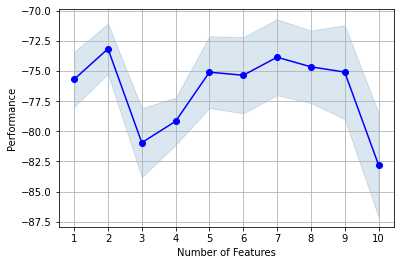

In [54]:
# Performa model dengan menggunakan feature berjumlah 1-10 
plot_sfs(sfs_mlxtend_forward.get_metric_dict(), kind='std_err')
plt.grid();

# Performa terbaik pada jumlah feature = 2

## **Backward Feature Selection**

Cara kerja Backward Feature Selection adalah dengan mengurangi feature satu per satu. Ini kebalikan dari metode Forward Feture Selection. Misalnya, kita punya 5 feature bernama X1, X2, X3, X4, X5. Tahapannya seperti berikut ini:

1. Menggunakan model dengan 5 feature.
    - Model menggunakan suatu algoritma tertentu, kemudian melakukan fitting pada data train dengan 5 feature, kemudian melakukan prediksi pada test set dengan 5 feature (semua feature). 
    - Maka kita akan mendapatkan score performa dari model yang hanya menggunakan 5 feature tersebut, yaitu [X1,X2,X3,X4,X5].
<br><br>

2. Memilih 4 feature
    - Model akan melakukan fitting dan prediksi dengan 4 feature, misalnya: [X2,X3,X4,X5], [X1,X3,X4,X5], [X1,X2,X4,X5], dan [X1,X2,X3,X5]. Dengan kata lain akan kita melakukan mencoba membuang 1 feature pada 4 skenario tersebut.
    - Kemudian akan dipilih 4 feature dengan score performa terbaik, misalnya [X1,X2,X4,X5]. Dengan kata lain, feature X3 adalah feature yang paling tidak penting diantara semua feature.
<br><br>

3. Melakukan proses yang sama
    - Memilih 3 feature terbaik.
    - Memilih 2 feature terbaik
    - Terisisa 1 feature.
<br><br>

4. Kita sudah punya 5 skenario model, yaitu dengan: 5,4,3,2, dan 1 fature.
<br><br>

5. Kita bisa memilih score performa terbaik di antara 5 skenario tersebut.
 

!["Backward Feature Selection"](backward_feature_selection.JPG)

### Backward Feature Selection with mlxtend

In [55]:
model = DecisionTreeRegressor(random_state=1)

sfs_mlxtend_back = SFS(
    estimator=model,  
    k_features=1,  
    forward=False,  
    verbose=0,  
    scoring='neg_root_mean_squared_error',
    cv=5
)

sfs_mlxtend_back.fit(X_train, y_train)

SequentialFeatureSelector(estimator=DecisionTreeRegressor(random_state=1),
                          forward=False, scoring='neg_root_mean_squared_error')

In [56]:
# score tiap pengurangan jumlah feature
pd.DataFrame.from_dict(sfs_mlxtend_back.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[-96.0027141635098, -88.7434980756575, -79.973...",-82.781376,"(age, sex, bmi, bp, s1, s2, s3, s4, s5, s6)",11.103283,8.638731,4.319366
9,"(0, 1, 2, 3, 4, 5, 6, 7, 9)","[-88.60594835848799, -71.07653086242054, -65.7...",-75.080321,"(age, sex, bmi, bp, s1, s2, s3, s4, s6)",10.01696,7.793535,3.896767
8,"(0, 1, 2, 3, 4, 5, 7, 9)","[-84.18156099329357, -72.41877431467228, -68.2...",-74.6442,"(age, sex, bmi, bp, s1, s2, s4, s6)",7.730407,6.014519,3.007259
7,"(0, 1, 2, 3, 5, 7, 9)","[-80.7801746700161, -72.82044288116113, -70.79...",-73.84438,"(age, sex, bmi, bp, s2, s4, s6)",8.096054,6.299005,3.149503
6,"(0, 2, 3, 5, 7, 9)","[-83.02943649058243, -66.99484949721828, -73.8...",-75.274787,"(age, bmi, bp, s2, s4, s6)",8.169221,6.355931,3.177966
5,"(2, 3, 5, 7, 9)","[-82.05966568536802, -80.71616065912264, -77.1...",-78.527627,"(bmi, bp, s2, s4, s6)",6.281228,4.887008,2.443504
4,"(2, 3, 7, 9)","[-80.58291154955135, -75.42069802210031, -82.0...",-76.879824,"(bmi, bp, s4, s6)",5.194989,4.041878,2.020939
3,"(2, 7, 9)","[-79.75581130312523, -76.4579420427234, -71.17...",-79.110837,"(bmi, s4, s6)",6.319287,4.91662,2.45831
2,"(7, 9)","[-75.91457594148561, -85.44681307017696, -80.6...",-81.241082,"(s4, s6)",4.709138,3.66387,1.831935
1,"(7,)","[-68.67453269337473, -78.37494816256249, -82.0...",-75.680062,"(s4,)",5.84961,4.551195,2.275598


- Score RMSE terbaik (paling mendekati 0) adalah pada saat model menggunakan 7 features.
- Karena metode bacward ini iterasinya mundur, dari banyak feature kemudian dikurangi satu per satu, maka hasilnya pun berbeda dengan metode forward yang iterasinya maju, dari 1 feature kemudian ditambah satu per satu.

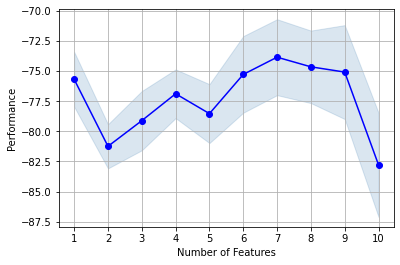

In [57]:
# Performa model menggunakan 1-10 features
plot_sfs(sfs_mlxtend_back.get_metric_dict(), kind='std_err')
plt.grid();

# Performa terbaik pada jumlah feature = 7

## **Exhautive Feature Selection**

- Exhaustive feature selection mencoba seluruh kombinasi feature.
- Pada forward feature selection setelah kita mendapat feature terbaik pada 1 feature, misalnya X2, maka modeling dengn 2 feature salah satu featurenya akan menggunakan X2 dan feature lainnya, adalah X1, X3, X4, X5. Kombinasi X1 dan X3 tidak akan dicoba pada modeling dengan 2 feature.
- Pada exhaustive feature selection, X1 dan X3 juga dicoba akan pada modeling dengan 2 feature. Begitu juga dengan kombinasi 2 feature yang lainnya.
- Kita bisa membatasi minimum dan maximum feature yang ingin digunakan

### Exhautive Feature Selection with mlxtend

In [58]:
model = DecisionTreeRegressor(random_state=1)

efs_mlxtend = EFS(
    estimator=model,
    min_features=2,  
    max_features=7,  
    cv=3,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

efs_mlxtend.fit(X_train, y_train)

Features: 957/957

ExhaustiveFeatureSelector(cv=3, estimator=DecisionTreeRegressor(random_state=1),
                          max_features=7, min_features=2, n_jobs=-1,
                          scoring='neg_root_mean_squared_error')

In [59]:
efs_mlxtend.best_score_

-71.19133854753795

In [60]:
efs_mlxtend.best_feature_names_

('age', 'sex', 'bmi', 'bp', 's3', 's5')

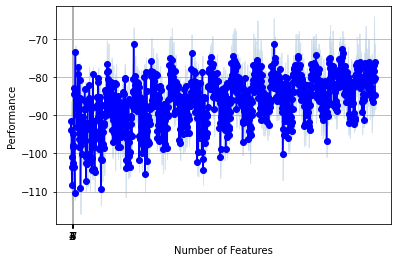

In [61]:
plot_sfs(efs_mlxtend.get_metric_dict())
plt.grid();

### *Referensi*

- https://www.slideshare.net/VishalPatel321/feature-reduction-techniques
- https://www.researchgate.net/figure/Merits-and-demerits-of-filter-wrapper-and-embedded-feature-selection-methods_tbl1_313098800
- https://www.youtube.com/watch?v=nPHU1CpX4jg&list=PLc2rvfiptPSQYzmDIFuq2PqN2n28ZjxDH